# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass am Grund des Sees habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** _(Hinweis: Der Auslassquerschnitt ist im Verhältnis zur Oberfläche so gering, dass der Kegel als spitz angenommen werden kann.)_

In [1]:
# Hier eigenen Code schreiben ...
from numpy import pi

# A = r**2 * pi
# V = 1/3 * A * h

g = 9.81          # [m/s^2]
A_aus = 2         # [m2]
V0 = 215*10**6    # [m^3]
A0 = 10*10**6     # [m^2]
r0 = (A0/pi)**0.5 # [m]
h0 = 3 * V0 / A0  # [m]

print(f"Die Tiefe des Sees ist {h0}m.")

Die Tiefe des Sees ist 64.5m.


Vereinfachend werde angenommen, dass die sich ausbildende Strömung mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschrieben werden kann:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei ist 

|||
|-|-|
|$u$ | Strömungsgeschwindigkeit des Fluids |
|$p$ | hydrodynamischer Druck| 
|$\rho$| Dichte des Fluids |
|$z$ | Höhe über einem Referenzpunkt|
|$g=9{,}81\frac{\text{m}}{\text{s}^2}$ | Erdbeschleunigung| 

Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$
Der Referenzpunkt für die $z$-Werte kann beliebig gewählt werden. Die Tiefe des Sees ist definiert als Differenz der Höhe der Oberfläche und der Höhe des Ausflusses.

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [2]:
# Hier eigenen Code schreiben ...
def Stroem_Vol(h):
    u_aus = (2 * g * h)**0.5
    V_aus = u_aus * A_aus
    return u_aus, V_aus

u_aus0, V_aus0 = Stroem_Vol(h0)

#u_aus0 = (2 * g * h0)**0.5
#V_aus0 = u_aus * A_aus

print(f"u_aus,0 = {u_aus0:.2f}m/s\nV_aus,0 = {V_aus0:.2f}m^3/s")

u_aus,0 = 35.57m/s
V_aus,0 = 71.15m^3/s


Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [3]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.** _(Hinweis: Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.)_

In [4]:
def tiefe(V):
    # Hier eigenen Code schreiben ...
    # r0/h0 = r/h
    # V = 1/3 * r**2 * pi * h
    # V = 1/3 * (r0/h0*h)**2 * pi * h
    # V = 1/3 * (r0/h0)**2 * h**3 * pi
    h = (3 * V / (pi * (r0/h0)**2))**(1/3)
    return h

V_test = [V0, 1/2*V0, 1/8*V0, 0, 1, 10, pi]
for V in V_test:
    t = tiefe(V)
    print(f"V = {V:12.2f}m^3 --> Tiefe = {t:5.2f}m")

V = 215000000.00m^3 --> Tiefe = 64.50m
V = 107500000.00m^3 --> Tiefe = 51.19m
V =  26875000.00m^3 --> Tiefe = 32.25m
V =         0.00m^3 --> Tiefe =  0.00m
V =         1.00m^3 --> Tiefe =  0.11m
V =        10.00m^3 --> Tiefe =  0.23m
V =         3.14m^3 --> Tiefe =  0.16m


**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [5]:
def abfluss(V0, dt):
    # Hier eigenen Code schreiben ...
    v_list = [V0]
    t_list = [0]
    h_list = [tiefe(V0)]
    V = V0
    while V > 0:
        t_list.append(t_list[-1]+dt) # am Ende des Tages
        h = h_list[-1]               # am Anfang des Tages
        u_aus, dV = Stroem_Vol(h)     # am Anfang des Tages
        V = V - dV * dt               # am Ende des Tages
        h = tiefe(V)                  # am Ende de Tages
        h_list.append(h)              # am Ende de Tages
        v_list.append(V)              # am Ende de Tages
    t_list.pop()
    h_list.pop()
    v_list.pop()
    return t_list, h_list, v_list

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x,y,title,label,xlabel,ylabel):
    plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o', label=label)
    plt.legend(loc='upper right', fontsize=15)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=0, labelpad=25)
    plt.grid(True)
    plt.title(title, fontsize=20)

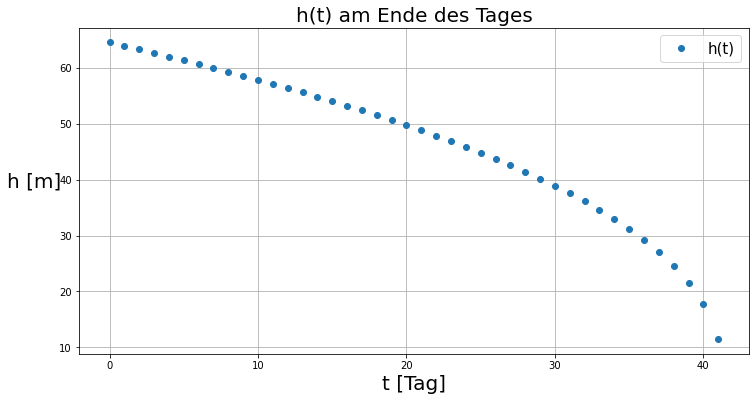

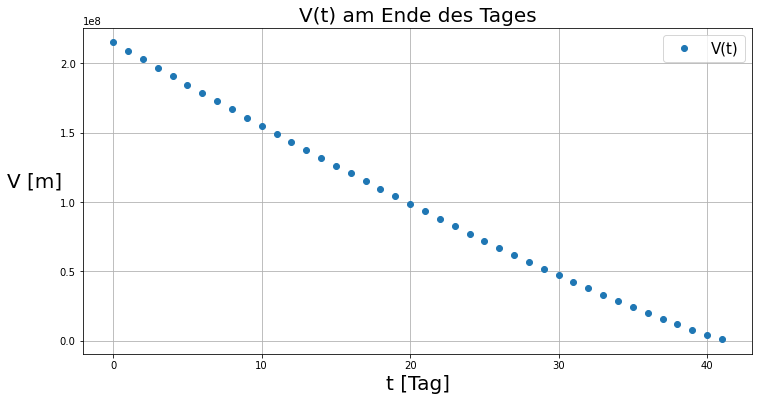

In [7]:
V = V0
dt = 3600*24 # [Tag]
t,h,v = abfluss(V,dt)
tx = range(len(t))

plot(tx, h, 'h(t) am Ende des Tages', 'h(t)', 't [Tag]', 'h [m]')
plot(tx, v, 'V(t) am Ende des Tages', 'V(t)', 't [Tag]', 'V [m]')

**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?**
  * Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
    * $\Delta t_1$ = 1 Minute
    * $\Delta t_2$ = 4 Tage
  * Zeichnen Sie beide Verläufe in _ein_ Diagramm und diskutieren Sie Auffälligkeiten.

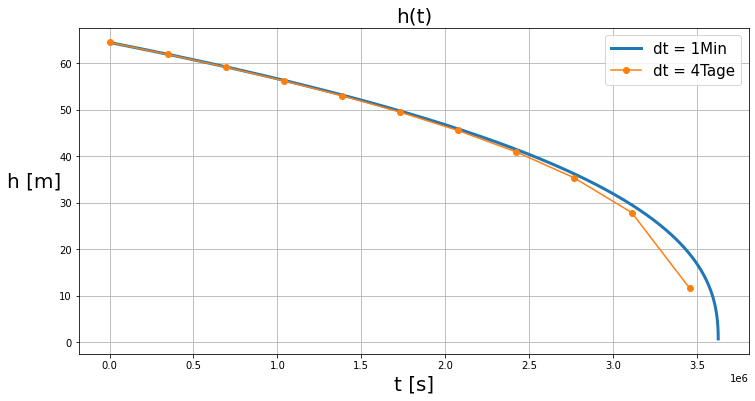

In [8]:
#%matplotlib inline
#from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
# Hier eigenen Code schreiben ...
# show()

V = V0
dt1 = 60        # [Minute]
dt2 = 3600*24*4 # [4Tage]
t1,h1,v1 = abfluss(V,dt1)
t2,h2,v2 = abfluss(V,dt2)
plt.figure(figsize=(12,6))
plt.plot(t1,h1,linewidth=3,label = 'dt = 1Min')
plt.plot(t2,h2,'o-',label = 'dt = 4Tage')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('t [s]', fontsize=20)
plt.ylabel('h [m]', fontsize=20, rotation=0, labelpad=25)
plt.grid(True)
plt.title('h(t)', fontsize=20)
plt.show()

**Antwort:**
Wegen groesserer Schrittweite ist die orange Funktion ungenauer im Vergleich zur blaue Funktion mit deutlich kleinerer Schrittweite.

**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.**

*Hinweis: Die Form des Sees sollte nur in der Funktion `tiefe` vorkommen, d.h. Sie müssen nur diese ändern / neu definieren.*

In [9]:
# Hier eigenen Code schreiben ...
def tiefe_zyl(V):
    # V = r0**2 * pi * h
    h = V / (pi * r0)**2
    return h

def abfluss_zyl(V0, dt):
    # Hier eigenen Code schreiben ...
    v_list = [V0]
    t_list = [0]
    h_list = [tiefe_zyl(V0)]
    V = V0
    while V > 0:
        t_list.append(t_list[-1]+dt) # am Ende des Tages
        h = h_list[-1]               # am Anfang des Tages
        u_aus, dV = Stroem_Vol(h)     # am Anfang des Tages
        V = V - dV * dt               # am Ende des Tages
        h = tiefe_zyl(V)              # am Ende de Tages
        h_list.append(h)              # am Ende de Tages
        v_list.append(V)              # am Ende de Tages
    return t_list, h_list, v_list

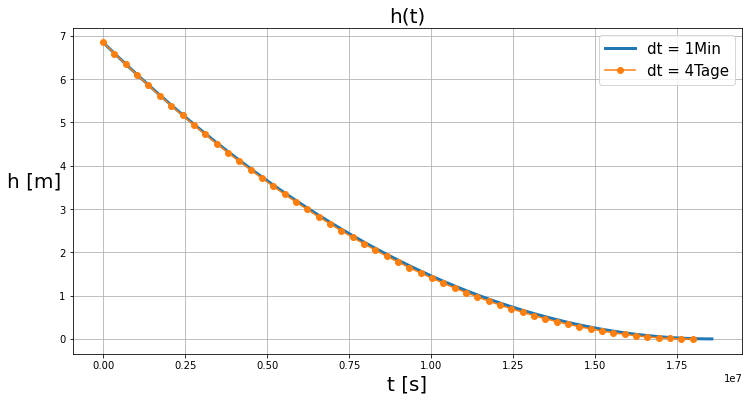

In [10]:
V = V0
dt1 = 60        # [Minute]
dt2 = 3600*24*4 # [4Tage]
t1,h1,v1 = abfluss_zyl(V,dt1)
t2,h2,v2 = abfluss_zyl(V,dt2)
plt.figure(figsize=(12,6))
plt.plot(t1,h1,linewidth=3,label = 'dt = 1Min')
plt.plot(t2,h2,'o-',label = 'dt = 4Tage')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('t [s]', fontsize=20)
plt.ylabel('h [m]', fontsize=20, rotation=0, labelpad=25)
plt.grid(True)
plt.title('h(t)', fontsize=20)
plt.show()